In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
  

In [109]:
### Load and review data
footballer_df = pd.read_csv("Footballer.csv")  

In [110]:
pd.set_option('display.max_columns', None)
footballer_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [111]:
footballer_df.shape

(18207, 89)

In [112]:
footballer_df.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16794,16794,240224,R. Escobar,21,https://cdn.sofifa.org/players/4/19/240224.png,Chile,https://cdn.sofifa.org/flags/55.png,56,62,San Luis de Quillota,https://cdn.sofifa.org/teams/2/light/112668.png,€130K,€1K,1375,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,32.0,NaN,CD Everton de Viña del Mar,"Dec 31, 2018",5'7,139lbs,54+2,54+2,54+2,56+2,56+2,56+2,56+2,56+2,54+2,54+2,54+2,53+2,46+2,46+2,46+2,53+2,41+2,36+2,36+2,36+2,41+2,39+2,32+2,32+2,32+2,39+2,44.0,56.0,40.0,47.0,45.0,61.0,41.0,39.0,39.0,60.0,70.0,72.0,66.0,45.0,87.0,65.0,36.0,39.0,35.0,50.0,28.0,24.0,55.0,49.0,50.0,41.0,28.0,22.0,24.0,14.0,12.0,9.0,13.0,10.0,NaN
1092,1092,152999,R. Palacio,36,https://cdn.sofifa.org/players/4/19/152999.png,Argentina,https://cdn.sofifa.org/flags/52.png,77,77,Bologna,https://cdn.sofifa.org/teams/2/light/189.png,€3.2M,€27K,2001,Right,2.0,3.0,4.0,High/ High,Lean,Yes,RS,24.0,"Aug 18, 2017",NaN,2019,5'9,154lbs,75+2,75+2,75+2,77+2,77+2,77+2,77+2,77+2,77+2,77+2,77+2,76+2,70+2,70+2,70+2,76+2,59+2,57+2,57+2,57+2,59+2,56+2,53+2,53+2,53+2,56+2,70.0,76.0,74.0,76.0,76.0,82.0,78.0,67.0,56.0,84.0,79.0,77.0,79.0,76.0,81.0,70.0,76.0,65.0,61.0,60.0,78.0,39.0,80.0,77.0,79.0,82.0,40.0,33.0,30.0,17.0,14.0,17.0,17.0,17.0,€5.4M
15994,15994,240476,B. Kavlak,21,https://cdn.sofifa.org/players/4/19/240476.png,Turkey,https://cdn.sofifa.org/flags/48.png,58,66,Yeni Malatyaspor,https://cdn.sofifa.org/teams/2/light/113259.png,€190K,€2K,1393,Right,1.0,2.0,2.0,Medium/ Low,Lean,No,ST,43.0,"Jun 28, 2014",NaN,2020,5'10,143lbs,57+2,57+2,57+2,54+2,56+2,56+2,56+2,54+2,53+2,53+2,53+2,52+2,47+2,47+2,47+2,52+2,38+2,35+2,35+2,35+2,38+2,37+2,33+2,33+2,33+2,37+2,37.0,64.0,68.0,52.0,47.0,57.0,44.0,34.0,36.0,54.0,60.0,62.0,52.0,51.0,74.0,58.0,65.0,53.0,40.0,61.0,31.0,17.0,53.0,50.0,66.0,47.0,29.0,13.0,15.0,15.0,12.0,10.0,6.0,7.0,€418K
143,143,177413,A. Witsel,29,https://cdn.sofifa.org/players/4/19/177413.png,Belgium,https://cdn.sofifa.org/flags/7.png,84,84,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,€24M,€77K,2200,Right,3.0,4.0,4.0,Medium/ Medium,Lean,No,LCM,6.0,"Aug 17, 2018",NaN,2022,6'2,179lbs,77+3,77+3,77+3,77+3,78+3,78+3,78+3,77+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,78+3,80+3,82+3,82+3,82+3,80+3,80+3,81+3,81+3,81+3,80+3,69.0,71.0,80.0,89.0,77.0,78.0,69.0,68.0,79.0,84.0,67.0,74.0,78.0,84.0,60.0,78.0,76.0,86.0,82.0,74.0,82.0,80.0,75.0,79.0,81.0,89.0,80.0,79.0,85.0,5.0,7.0,7.0,10.0,7.0,€40.8M
7447,7447,170448,J. Zimmermann,33,https://cdn.sofifa.org/players/4/19/170448.png,Germany,https://cdn.sofifa.org/flags/21.png,68,68,Eintracht Frankfurt,https://cdn.sofifa.org/teams/2/light/1824.png,€450K,€9K,1096,Left,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,37.0,"Jul 1, 2017",NaN,2019,6'3,194lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,15.0,14.0,27.0,15.0,15.0,14.0,13.0,24.0,23.0,42.0,50.0,39.0,67.0,35.0,22.0,65.0,39.0,69.0,12.0,44.0,15.0,11.0,17.0,23.0,13.0,12.0,12.0,14.0,68.0,67.0,60.0,68.0,69.0,€765K
2731,2731,230199,Vinicius Cardenha,26,https://cdn.sofifa.org/players/4/19/230199.png,Brazil,https://cdn.sofifa.org/flags/54.png,73,73,Fluminense,https://cdn.sofifa.org/teams/2/light/567.png,€3.4M,€21K,1806,Right,1.0,3.0,2.0,Medium/ High,Lean,No,RB,2.0,"Jan 1, 2018",NaN,2021,5'10,161lbs,58+2,58+2,58+2

In [113]:
footballer_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [114]:
for col in footballer_df.columns:
    print(col)

Unnamed: 0
ID
Name
Age
Photo
Nationality
Flag
Overall
Potential
Club
Club Logo
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Release Clause


In [115]:
footballer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


### What is the distribution  of preferred foot?


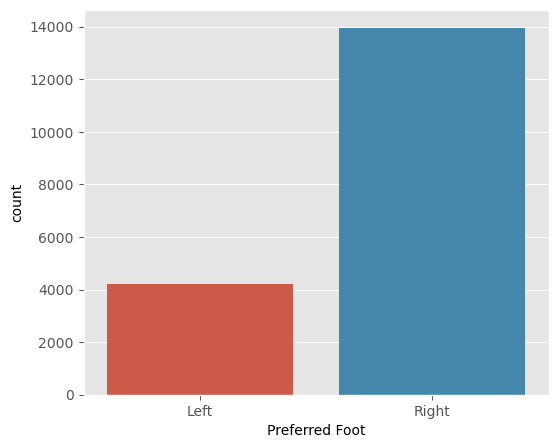

In [116]:
plt.figure(figsize=(6,5))
sns.countplot(x=footballer_df['Preferred Foot'],data=footballer_df)
plt.show()

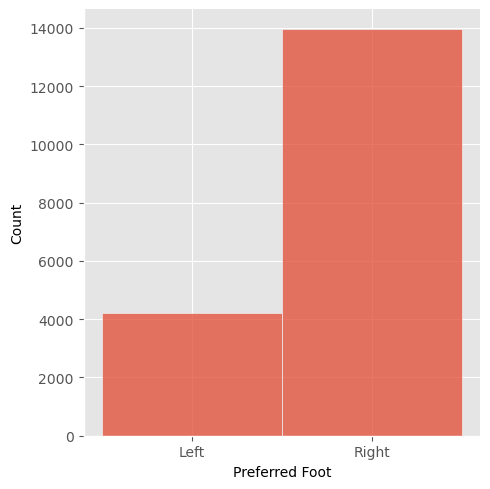

In [117]:
sns.displot(x=footballer_df['Preferred Foot'],data=footballer_df)

### How can we visualize the age distribution of players?

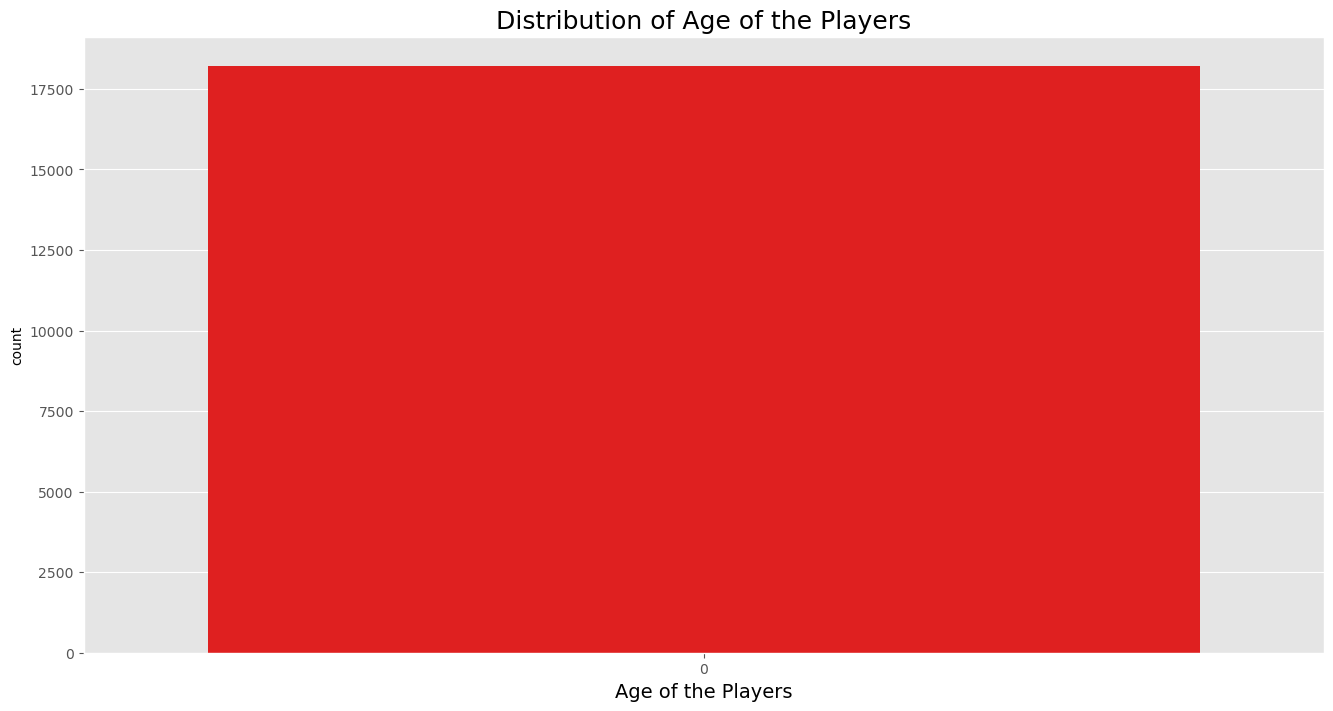

In [118]:
x = footballer_df['Age']
plt.figure(figsize=(16,8))
ax = sns.countplot(x, color='r')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 14)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 18)
plt.show()

In [119]:
footballer_df['Age'].mean()

25.122205745043114

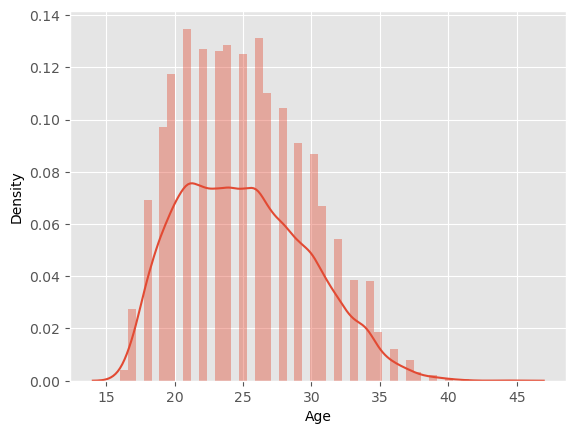

In [120]:
sns.distplot(footballer_df['Age'])
plt.show()

### What is the international reputation of left and right foot?

In [121]:
footballer_df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12693
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: International Reputation, dtype: int64

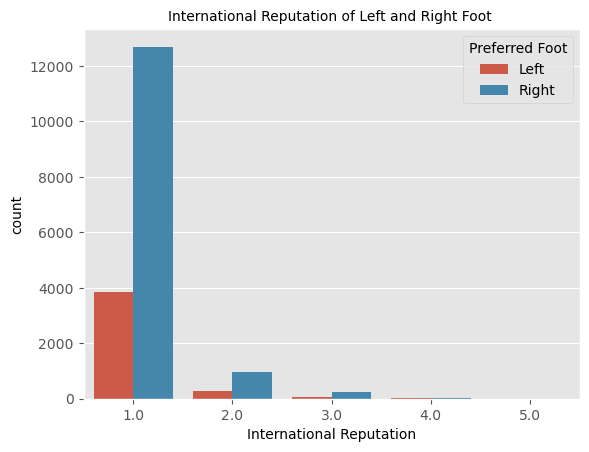

In [122]:
sns.countplot(hue=footballer_df['Preferred Foot'],x=footballer_df['International Reputation'],data=footballer_df)
plt.title('International Reputation of Left and Right Foot ', fontsize = 10)
plt.show()


### What is the different work rate of the Players?

In [123]:
footballer_df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

### Top 10 countries with most number of players

In [124]:
top_countries = footballer_df['Nationality'].value_counts().head(10)
top_countries

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

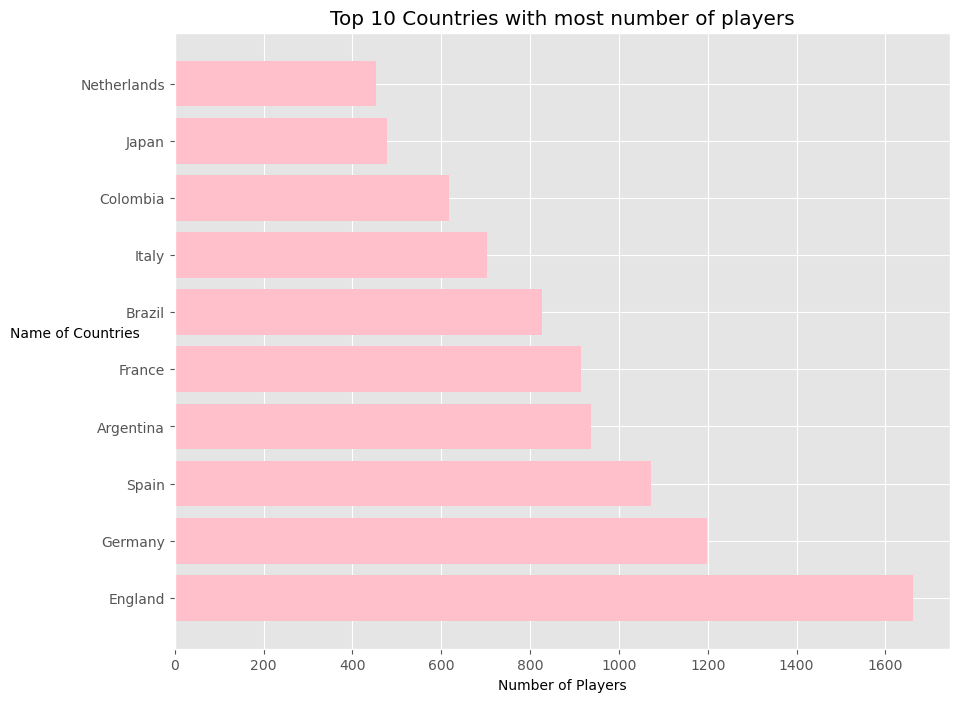

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='pink')
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

### What is the work rate of players segregated by preferred foot?

[Text(0, 0, 'Medium/ Medium'),
 Text(1, 0, 'High/ Low'),
 Text(2, 0, 'High/ Medium'),
 Text(3, 0, 'High/ High'),
 Text(4, 0, 'Medium/ High'),
 Text(5, 0, 'Medium/ Low'),
 Text(6, 0, 'Low/ High'),
 Text(7, 0, 'Low/ Medium'),
 Text(8, 0, 'Low/ Low')]

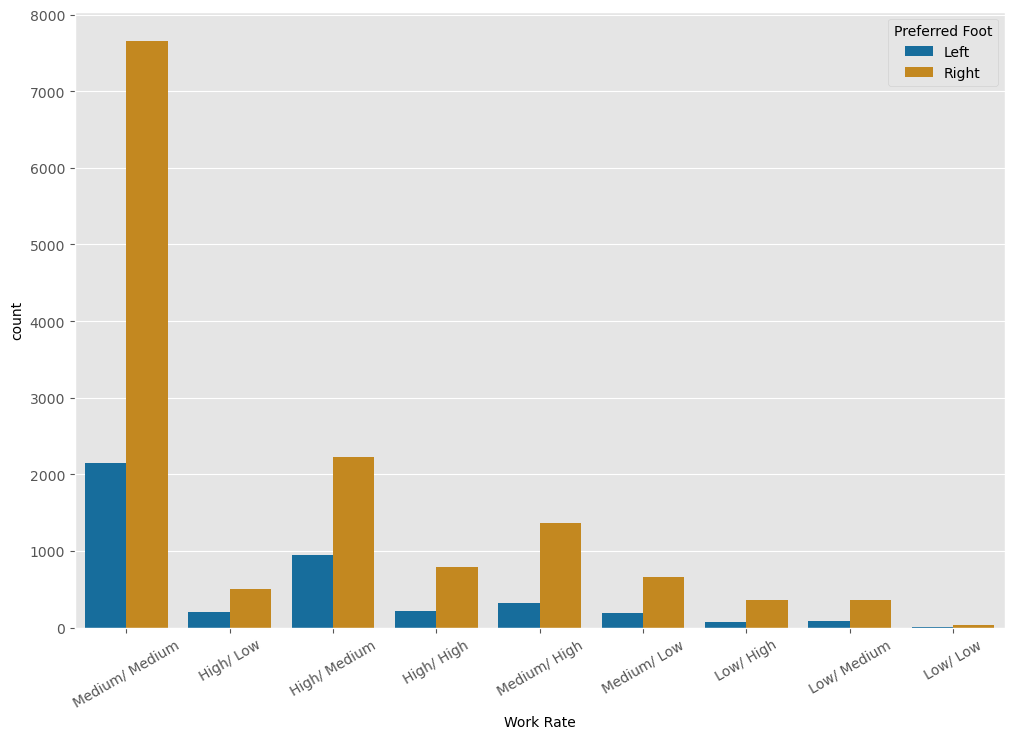

In [126]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=footballer_df['Work Rate'], data=footballer_df, hue='Preferred Foot', palette = 'colorblind')
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)

### Number of players at different positions? 



In [127]:
footballer_df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

### Age distribution in top countries

In [128]:
top_countries= top_countries.index
top_countries

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

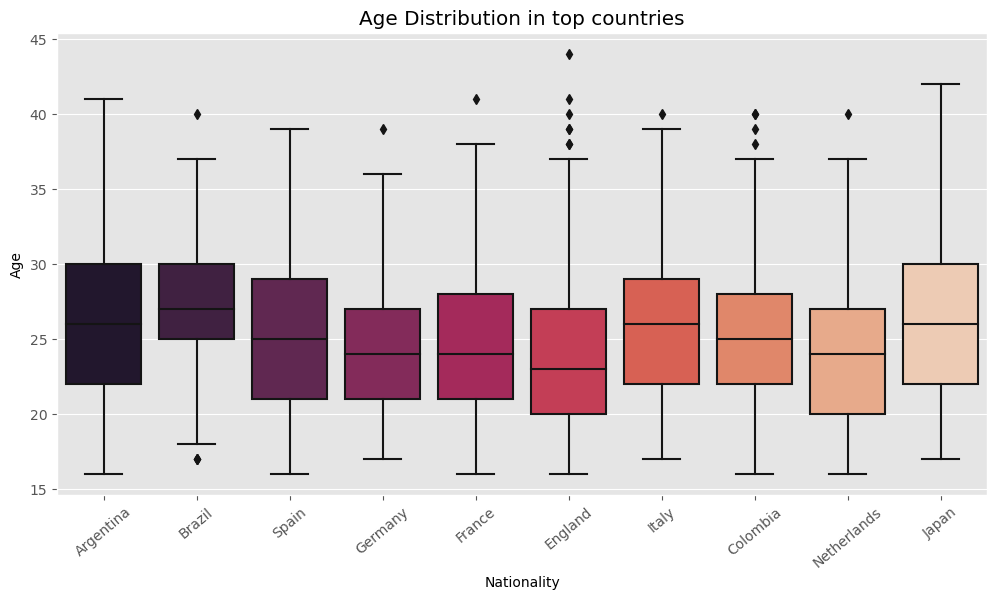

In [129]:
df_country_age = footballer_df.loc[footballer_df['Nationality'].isin(top_countries)]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 40)
plt.show()

### What is the distribution of overall score of players from top countries?

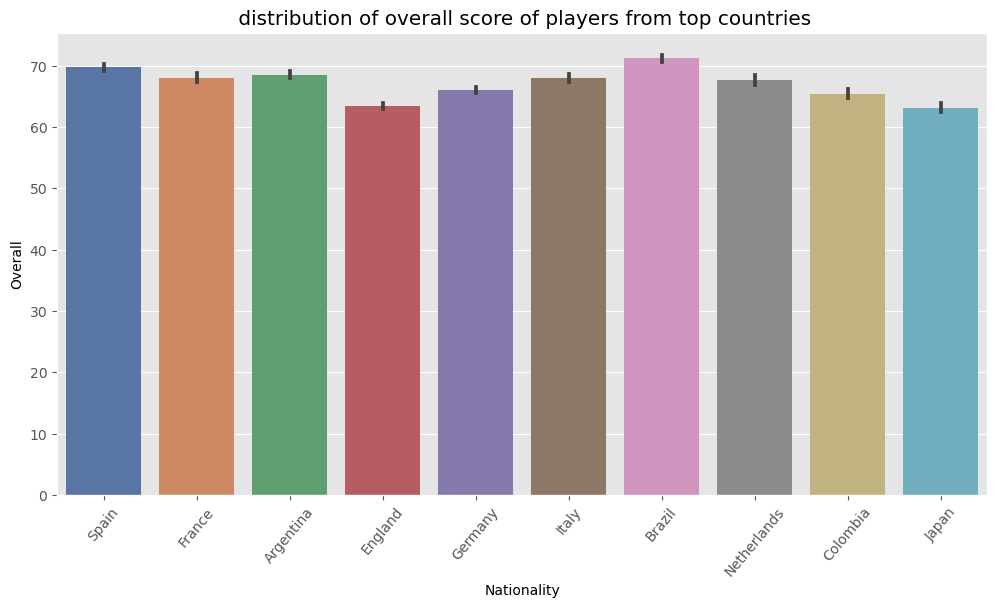

In [130]:
df_country_rating = footballer_df.loc[footballer_df['Nationality'].isin(top_countries) & footballer_df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='deep')
plt.title(' distribution of overall score of players from top countries')
plt.xticks(rotation = 50)
plt.show()